In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#load dataset
df=pd.read_excel("clust.xlsx")

In [5]:
#load first five rows
df.head()

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
0,Agave,9,Succulent,Moderate,Thick,Moderate,Moderate
1,Common Ferns,7,Fern,High,Thin,High,Slow
2,Snake Plant,3,Succulent,Low,Thick,High,Slow
3,Peace Lily,1,Herbaceous,Low,Thin,Moderate,Slow
4,Spider Plant,3,Herbaceous,Moderate,Thin,High,Moderate


In [6]:
#load last five rows
df.tail()

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
99,Zebra Plant,2,Herbaceous,Low,Thin,High,Slow
100,Delphinium,4,Herbaceous,High,Thin,High,Moderate
101,Heather,3,Shrub,Low,Thin,Moderate,Slow
102,Baby Sun Rose,2,Herbaceous,Low,Thin,High,Slow
103,Cosmos,4,Herbaceous,High,Thin,High,Moderate


In [7]:
# rows, columns
df.shape

(104, 7)

In [8]:
# rows * columns
df.size

728

In [9]:
# columns names
df.columns

Index(['Plant', 'CO2 Absorption Rate', 'Growth Habit', 'Leaf Surface Area',
       'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate'],
      dtype='object')

In [10]:
# information about the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Plant                   104 non-null    object
 1   CO2 Absorption Rate     104 non-null    int64 
 2   Growth Habit            104 non-null    object
 3   Leaf Surface Area       104 non-null    object
 4   Leaf Structure          104 non-null    object
 5   Tolerance to Pollution  104 non-null    object
 6   Growth Rate             104 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [11]:
# checking null values
df.isnull().sum()

Plant                     0
CO2 Absorption Rate       0
Growth Habit              0
Leaf Surface Area         0
Leaf Structure            0
Tolerance to Pollution    0
Growth Rate               0
dtype: int64

In [12]:
# checking duplicate values
df.duplicated().value_counts()

False    102
True       2
dtype: int64

In [14]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [16]:
# confirming non-duplicates
df.shape

(102, 7)

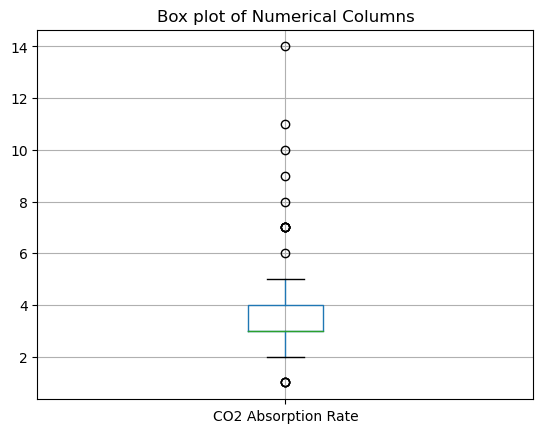

In [17]:
# checking outliers
df.boxplot('CO2 Absorption Rate')
plt.title('Box plot of Numerical Columns')
plt.show()

In [19]:
# removing outliers
df = df[(df['CO2 Absorption Rate'] >= 2) & (df['CO2 Absorption Rate'] <= 5)]

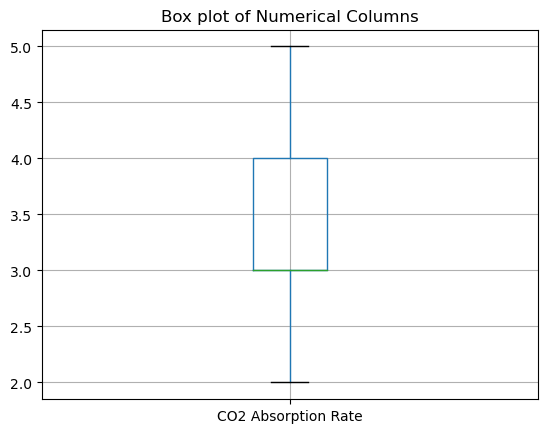

In [20]:
# confirming outliers removal
df.boxplot('CO2 Absorption Rate')
plt.title('Box plot of Numerical Columns')
plt.show()

In [21]:
# get statistical summary
df.describe()

,CO2 Absorption Rate
count,86.000000
mean,3.313953
std,0.973310
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [22]:
# checking unique values in each column
df.nunique()

Plant                     86
CO2 Absorption Rate        4
Growth Habit               8
Leaf Surface Area          3
Leaf Structure             3
Tolerance to Pollution     2
Growth Rate                3
dtype: int64

In [26]:
# resetting the numbering of index
df.reset_index(drop=True, inplace=True)

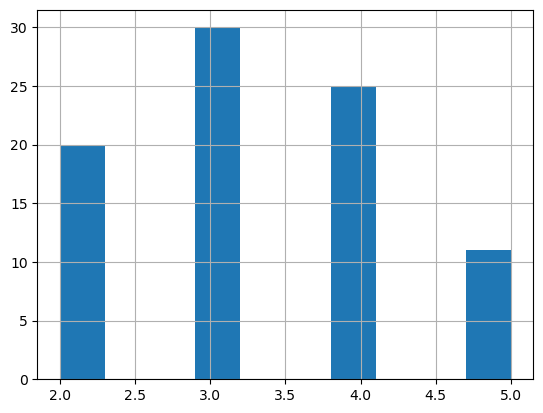

In [34]:
# visualizing co2 absorption rate
df['CO2 Absorption Rate'].hist()
plt.show()


Unique values and their frequencies for Growth Habit :
Herbaceous       65
Shrub             7
Herb              7
Climbing Vine     3
Succulent         1
Fern              1
Tree              1
Moss              1
Name: Growth Habit, dtype: int64


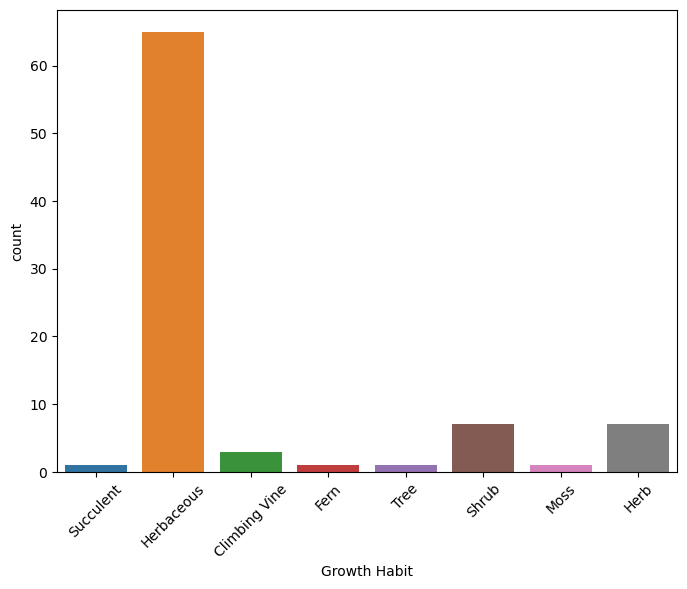


Unique values and their frequencies for Leaf Surface Area :
Low         53
High        19
Moderate    14
Name: Leaf Surface Area, dtype: int64


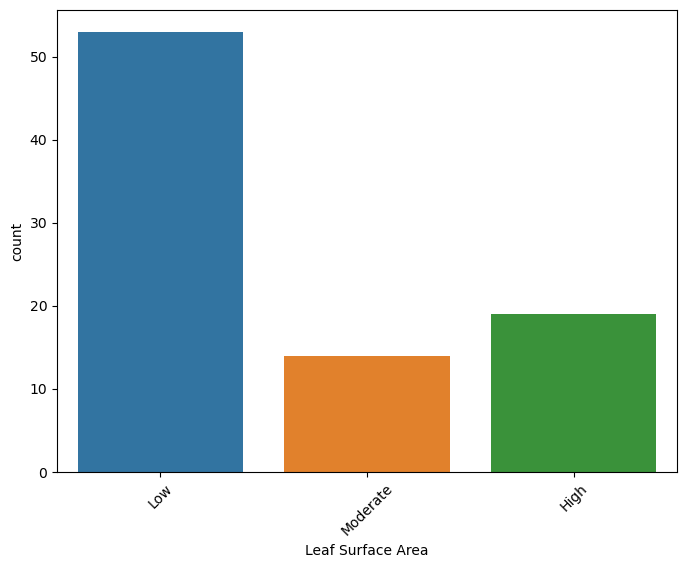


Unique values and their frequencies for Leaf Structure :
Thin        75
Thick        8
Moderate     3
Name: Leaf Structure, dtype: int64


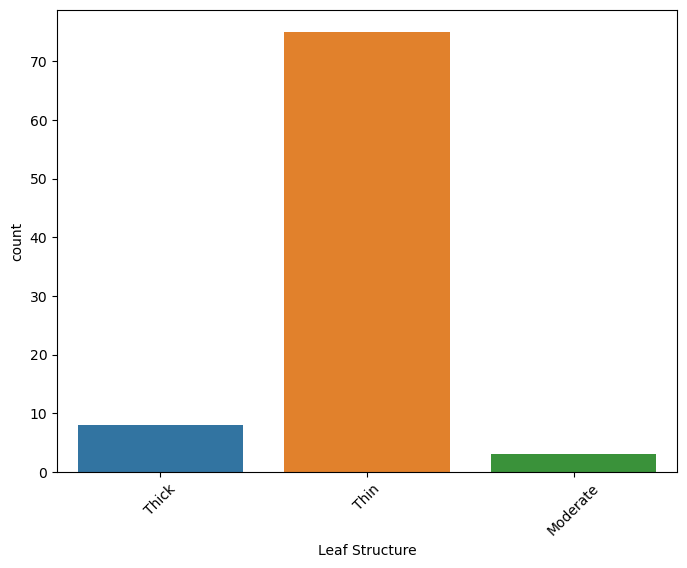


Unique values and their frequencies for Tolerance to Pollution :
High        57
Moderate    29
Name: Tolerance to Pollution, dtype: int64


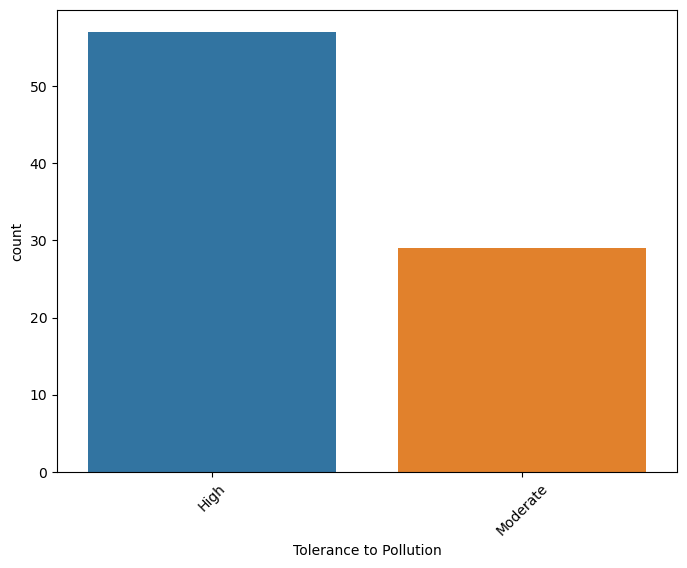


Unique values and their frequencies for Growth Rate :
Slow        53
Moderate    22
Fast        11
Name: Growth Rate, dtype: int64


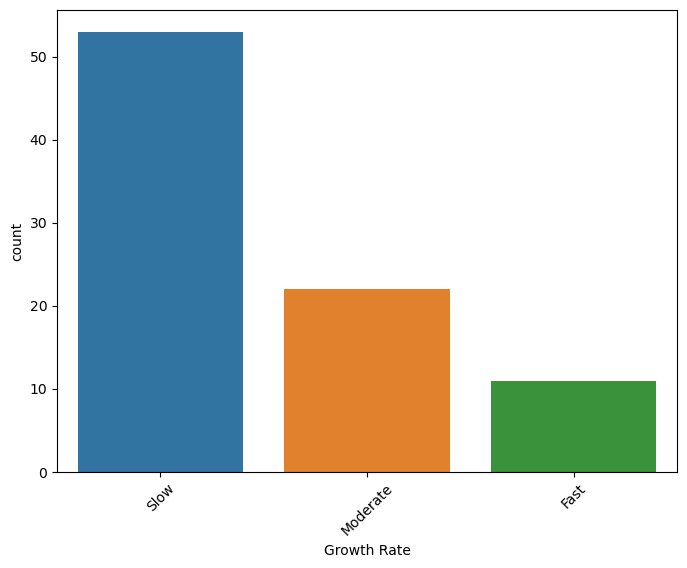

In [36]:
# visualizing columns such as growth habit, leaf surface area, leaf structure, tolerance to pollution and growth rate
categorical_cols = ['Growth Habit', 'Leaf Surface Area', 'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate']
for col in categorical_cols:
    print("\nUnique values and their frequencies for", col, ":")
    print(df[col].value_counts())

    # Bar plot for categorical variables
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

In [49]:
# feature engineering
# Identify the categorical columns
categorical_cols = ['Plant', 'Growth Habit', 'Leaf Surface Area', 'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate']

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [50]:
df

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
0,70,3,6,1,1,0,2
1,73,3,3,2,2,0,1
2,27,5,0,0,0,0,0
3,9,5,1,0,2,0,2
4,24,5,7,2,1,0,0
...,...,...,...,...,...,...,...
81,84,2,3,1,2,0,2
82,23,4,3,0,2,0,1
83,34,3,5,1,2,1,2
84,3,2,3,1,2,0,2


In [51]:
# splitting of dataset into X and y
X = df.drop('Growth Rate', axis=1)
y = df['Growth Rate']

In [52]:
# splitting of dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Create and train the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance summary
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.11it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.78               0.70    None      0.76   
BaggingClassifier                  0.78               0.70    None      0.76   
ExtraTreeClassifier                0.78               0.70    None      0.77   
ExtraTreesClassifier               0.78               0.70    None      0.76   
AdaBoostClassifier                 0.72               0.66    None      0.72   
XGBClassifier                      0.72               0.63    None      0.69   
DecisionTreeClassifier             0.72               0.63    None      0.70   
LabelPropagation                   0.72               0.62    None      0.69   
LabelSpreading                     0.72               0.62    None      0.69   
LGBMClassifier                     0.72               0.60    None      0.63   
Perceptron                         0.61 

In [60]:
# fitting the training set into top 4 classifiers: randomforest, bagging, extratree and extratrees
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

extra_tree_model = ExtraTreeClassifier()
extra_tree_model.fit(X_train, y_train)

extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)
bagging_y_pred = bagging_model.predict(X_test)
extra_tree_y_pred = extra_tree_model.predict(X_test)
extra_trees_y_pred = extra_trees_model.predict(X_test)

# checking confusion matrix and classification report of all 4 classifiers
print("Random Forest Classifier:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)
print(classification_report(y_test, rf_y_pred))

print("Bagging Classifier:")
bagging_cm = confusion_matrix(y_test, bagging_y_pred)
print(bagging_cm)
print(classification_report(y_test, bagging_y_pred))

print("Extra Tree Classifier:")
extra_tree_cm = confusion_matrix(y_test, extra_tree_y_pred)
print(extra_tree_cm)
print(classification_report(y_test, extra_tree_y_pred))

print("Extra Trees Classifier:")
extra_trees_cm = confusion_matrix(y_test, extra_trees_y_pred)
print(extra_trees_cm)
print(classification_report(y_test, extra_trees_y_pred))

Random Forest Classifier:
[[2 1 1]
 [1 3 1]
 [0 0 9]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.75      0.60      0.67         5
           2       0.82      1.00      0.90         9

    accuracy                           0.78        18
   macro avg       0.74      0.70      0.71        18
weighted avg       0.77      0.78      0.76        18

Bagging Classifier:
[[2 1 1]
 [0 3 2]
 [0 0 9]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      0.60      0.67         5
           2       0.75      1.00      0.86         9

    accuracy                           0.78        18
   macro avg       0.83      0.70      0.73        18
weighted avg       0.81      0.78      0.76        18

Extra Tree Classifier:
[[2 1 1]
 [1 3 1]
 [1 0 8]]
              precision    recall  f1-score   support

           0       0.50      0

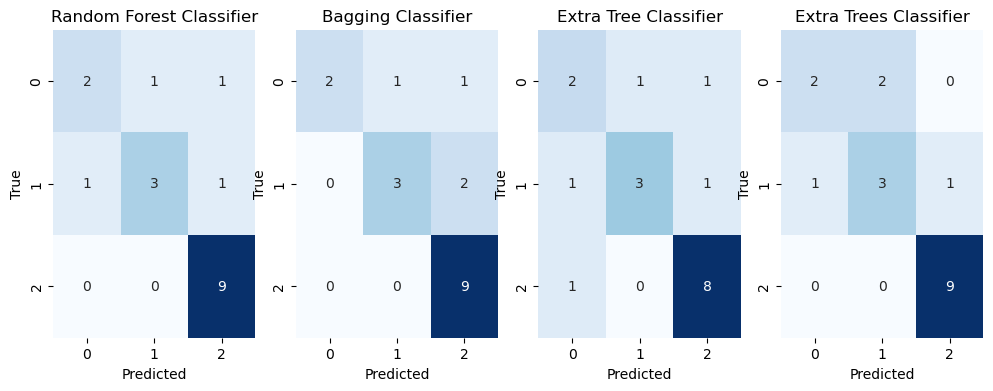

In [62]:
# visualizing confusion matrix of all 4 top classifiers
plt.figure(figsize=(12, 4))

plt.subplot(141)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(142)
sns.heatmap(bagging_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(143)
sns.heatmap(extra_tree_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(144)
sns.heatmap(extra_trees_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Extra Trees Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [58]:
# determining the best out of 4 classifiers
models = [
    ('Random Forest Classifier', rf_model),
    ('Bagging Classifier', bagging_model),
    ('Extra Tree Classifier', extra_tree_model),
    ('Extra Trees Classifier', extra_trees_model)
]

best_model = None
best_accuracy = 0.0

for model_name, model in models:
    # Perform cross-validation and compute accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy = scores.mean()

    # Print the accuracy for the current model
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Step 6: Fit the best model on the full training set and evaluate on the test set
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Best Model: {type(best_model).__name__}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.7659
Bagging Classifier Accuracy: 0.7934
Extra Tree Classifier Accuracy: 0.7813
Extra Trees Classifier Accuracy: 0.7813
Best Model: BaggingClassifier
Test Accuracy: 0.7778


In [69]:
# Fit the best model on the full dataset
best_model.fit(X, y)

# Get the input values for predicting the growth rate
new_plant = 70
new_co2_absorption_rate = 3
new_growth_habit = 6
new_leaf_surface_area = 1
new_leaf_structure = 1
new_tolerance_to_pollution = 0

# Create a DataFrame for the new input data
new_data = pd.DataFrame({
    'Plant': [new_plant],
    'CO2 Absorption Rate': [new_co2_absorption_rate],
    'Growth Habit': [new_growth_habit],
    'Leaf Surface Area': [new_leaf_surface_area],
    'Leaf Structure': [new_leaf_structure],
    'Tolerance to Pollution': [new_tolerance_to_pollution]
})

# Perform any necessary preprocessing on the new data (e.g., encoding categorical variables)

# Make predictions using the best model
predictions = best_model.predict(new_data)

# Print the predicted growth rate
print(f"Predicted Growth Rate for {new_plant}: {predictions[0]}")

Predicted Growth Rate for 70: 2


In [70]:
# Get the input values for predicting the growth rate
new_plant = 73
new_co2_absorption_rate = 8
new_growth_habit = 5
new_leaf_surface_area = 0
new_leaf_structure = 0
new_tolerance_to_pollution = 1

# Create a DataFrame for the new input data
new_data = pd.DataFrame({
    'Plant': [new_plant],
    'CO2 Absorption Rate': [new_co2_absorption_rate],
    'Growth Habit': [new_growth_habit],
    'Leaf Surface Area': [new_leaf_surface_area],
    'Leaf Structure': [new_leaf_structure],
    'Tolerance to Pollution': [new_tolerance_to_pollution]
})

# Perform any necessary preprocessing on the new data (e.g., encoding categorical variables)

# Make predictions using the best model
predictions = best_model.predict(new_data)

# Print the predicted growth rate
print(f"Predicted Growth Rate for {new_plant}: {predictions[0]}")

Predicted Growth Rate for 73: 0


In [73]:
# Get the input values for predicting the growth rate
new_plant = 18
new_co2_absorption_rate = 4
new_growth_habit = 3
new_leaf_surface_area = 0
new_leaf_structure = 2
new_tolerance_to_pollution = 0

# Create a DataFrame for the new input data
new_data = pd.DataFrame({
    'Plant': [new_plant],
    'CO2 Absorption Rate': [new_co2_absorption_rate],
    'Growth Habit': [new_growth_habit],
    'Leaf Surface Area': [new_leaf_surface_area],
    'Leaf Structure': [new_leaf_structure],
    'Tolerance to Pollution': [new_tolerance_to_pollution]
})

# Perform any necessary preprocessing on the new data (e.g., encoding categorical variables)

# Make predictions using the best model
predictions = best_model.predict(new_data)

# Print the predicted growth rate
print(f"Predicted Growth Rate for {new_plant}: {predictions[0]}")

Predicted Growth Rate for 18: 1
